# **Application de la classification**

La classification est une technique d'apprentissage supervisé qui consiste à attribuer des catégories ou des étiquettes à des données en fonction de leurs caractéristiques. Contrairement à la régression, qui prédit des valeurs continues, la classification vise à prédire une classe discrète. Les algorithmes de classification les plus courants incluent KNN,les arbres de decisions et les forêts aléatoires.

## **0. Imports**

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## **1. Charger les données**

Pour cet atelier, nous utiliserons un ensemble de données scikit-learn nommé **_Wisconsin Breast Cancer dataset_**. Il enregistre des mesures cliniques des tumeurs du sein. Chaque tumeur est étiquetée comme _"bénigne"_ ou _"maligne"_ et l'objectif est d'apprendre à prédire si une tumeur est maligne en fonction des mesures du tissu.

In [69]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [70]:
data=cancer['data']#colonnes des données
data.shape # nombre de lignes et de colonnes

(569, 30)

In [71]:
cancer['target_names']#les classes

array(['malignant', 'benign'], dtype='<U9')

In [72]:
cancer['feature_names']# les caracteristiques

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [73]:
X,y=cancer['data'],cancer['target']

In [74]:
X.shape, y.shape

((569, 30), (569,))

In [75]:
for value, count in zip(cancer['target_names'],  np.bincount(cancer['target'])):
    print(f"{value} apparait {count} fois")

malignant apparait 212 fois
benign apparait 357 fois


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25) # separer le dataset en entrainnement et test
X_train.shape,y_train.shape

((426, 30), (426,))

In [ ]:
# transformer les données (standardiser)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

## **2. KNN**

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=5)# k=5 nombre de voisins

In [81]:
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [82]:
y_pred = knn_model.predict(X_test)

In [83]:
print("KNN Exactitude:", accuracy_score(y_test, y_pred))

KNN Exactitude: 0.951048951048951


In [84]:
print("\nKNN Rapport de Classification:\n", classification_report(y_test, y_pred))


KNN Rapport de Classification:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        55
           1       0.94      0.99      0.96        88

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



**Matrice de confusion:**

|_label_|classed `benign`|classed `malignant`|
|---|---|---|
|`benign`|**True NEGATIVE**|_False POSITIVE_|
|`malignant`|_False NEGATIVE_|**True POSITIVE**|

In [85]:
COLOR="#3ade86"
def cm(model_name, predictions):# matrice de confusion
    disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=cancer.target_names,cmap='YlGn')
    disp.ax_.set_title(f"{model_name} Matrice de Confusion")
    plt.show()

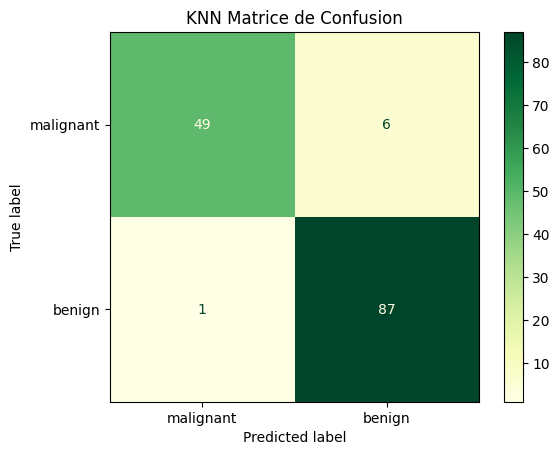

In [86]:
cm("KNN", y_pred)


## **3. Arbres de decisions**

In [87]:
dt_model = DecisionTreeClassifier(random_state=42,criterion="entropy", max_depth=4)
# Créer un modèle d'arbre de décision avec l'entropie comme critère de division
# 'random_state' fixe la graine pour la reproductibilité des résultats
# 'max_depth' limite la profondeur maximale de l'arbre à 4

In [88]:
dt_model.fit(X_train, y_train)#entrainnement

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [89]:
dt_pred = dt_model.predict(X_test)# prediction

In [90]:
print("Arbres de Decision Exactitude:", accuracy_score(y_test, dt_pred))

Arbres de Decision Exactitude: 0.9440559440559441


In [91]:
print("\n Arbres de Decision Rapport de Classification:\n", classification_report(y_test, dt_pred))


 Arbres de Decision Rapport de Classification:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.93      0.98      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



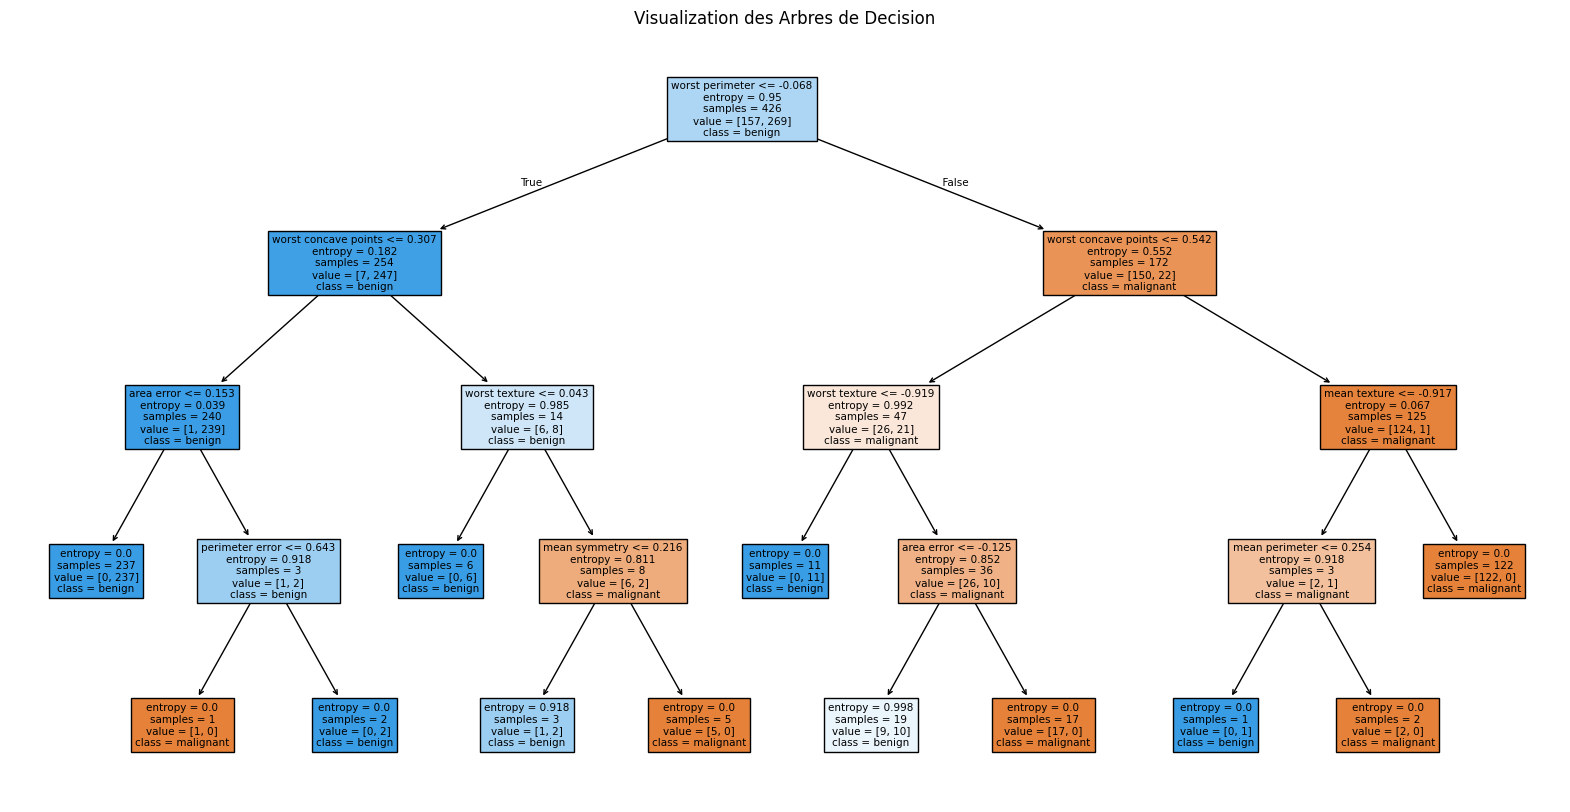

In [92]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.title("Visualization des Arbres de Decision")
plt.show()

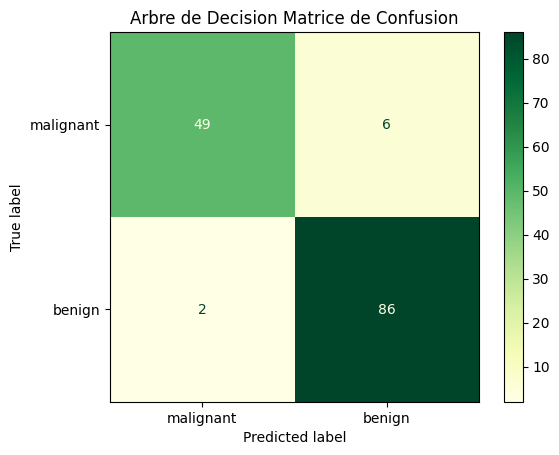

In [93]:
cm("Arbre de Decision",dt_pred )

## **4. Foret Aléatoire**

In [94]:
rf_model = RandomForestClassifier(random_state=42,n_estimators=15)
# Créer un modèle de forêt aléatoire avec 15 arbres (n_estimarors)

In [95]:
rf_model.fit(X_train, y_train)#entrainnement

RandomForestClassifier(n_estimators=15, random_state=42)

In [96]:
rf_pred = rf_model.predict(X_test)#prediction

In [97]:
print("Exactitude Forest aleatoire:", accuracy_score(y_test, rf_pred))

Exactitude Forest aleatoire: 0.951048951048951


In [98]:
print("\nForest aleatoire Rapport de Classification:\n", classification_report(y_test, rf_pred))


Forest aleatoire Rapport de Classification:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.95      0.98      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



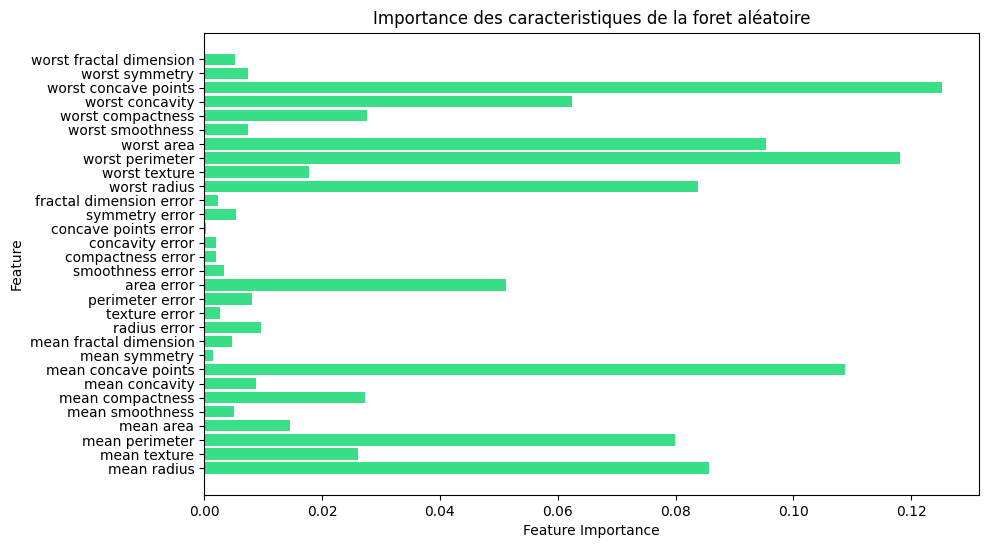

In [99]:
plt.figure(figsize=(10, 6))
plt.barh(cancer.feature_names, rf_model.feature_importances_,color=COLOR)  #importances calculées par le modèle RandomForest
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importance des caracteristiques de la foret aléatoire")
plt.show()

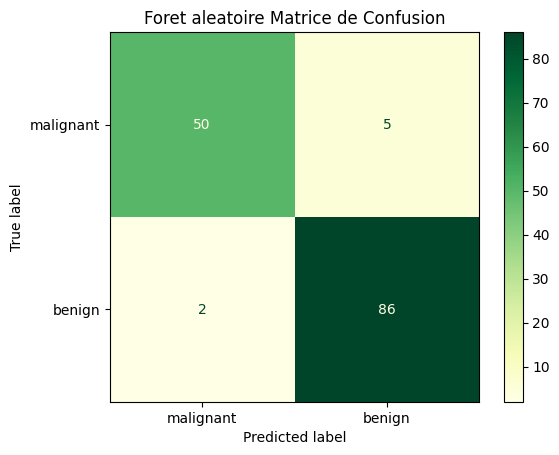

In [100]:
cm("Foret aleatoire", rf_pred)

## 5. **Réseau de neuronnes artificiel**

In [ ]:

# creer le modele
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')#sigmoid car il s'agit d une classification binaire
])

# Compiler le modele
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
# fonction d optimisation Adam avec taux d apprentissage de 0.0005 , fonction de perte "binary crosentropy" car il s agit d une classification binaire
# et metrique a suivre : exacttitude

# entrainner le model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=45, batch_size=32, verbose=1)
# validation split est le pourcentage des données entrainnement reserver au set de validation dans ce cas 20%

# Evaluer le model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte test: {loss:.4f}, Exactiude test: {accuracy:.4f}")

Epoch 1/45


c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6460 - loss: 1.0184 - val_accuracy: 0.5930 - val_loss: 1.0118
Epoch 2/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5894 - loss: 0.9935 - val_accuracy: 0.5930 - val_loss: 0.8473
Epoch 3/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6106 - loss: 0.7734 - val_accuracy: 0.6163 - val_loss: 0.7094
Epoch 4/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6970 - loss: 0.5701 - val_accuracy: 0.6279 - val_loss: 0.5941
Epoch 5/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.5372 - val_accuracy: 0.7093 - val_loss: 0.5009
Epoch 6/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7296 - loss: 0.4651 - val_accuracy: 0.7907 - val_loss: 0.4285
Epoch 7/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4296 - val_accuracy: 0.8721 - val_loss: 0.3717
Epoch 8/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8889 - loss: 0.3474 - val_accuracy: 0.9302 - val_loss: 0.3236
Ep

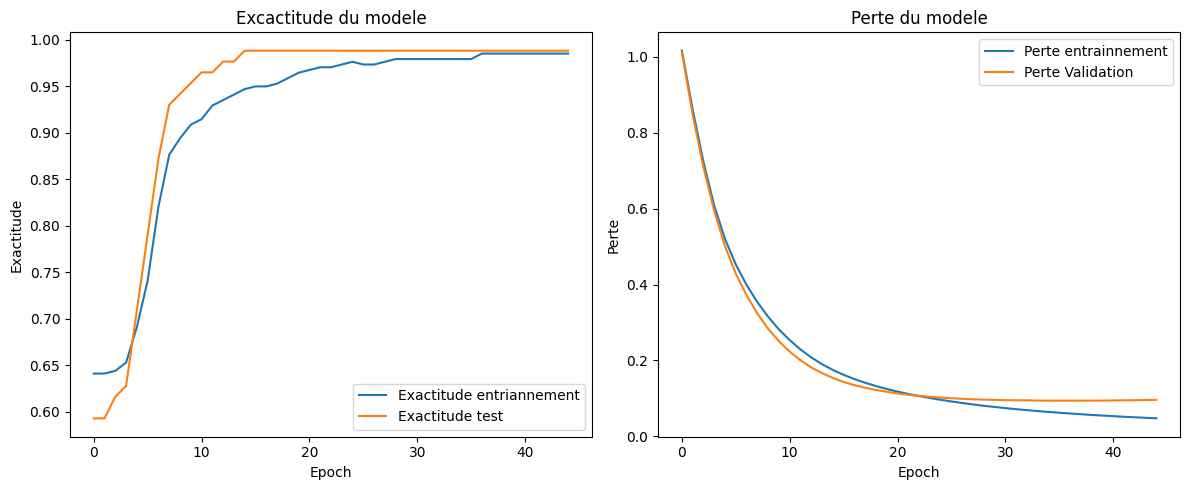

In [103]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Exactitude entriannement')
plt.plot(history.history['val_accuracy'], label='Exactitude test')
plt.title('Excactitude du modele')
plt.xlabel('Epoch')
plt.ylabel('Exactitude')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte entrainnement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.title('Perte du modele')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()